# VAC Assginment 1

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [177]:
data.shape

(150, 6)

In [178]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

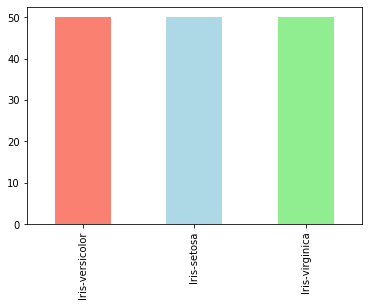

In [179]:
data["Species"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightgreen"]);

In [180]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [182]:
data = data.drop(['Id'], axis=1)

In [183]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [184]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [185]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


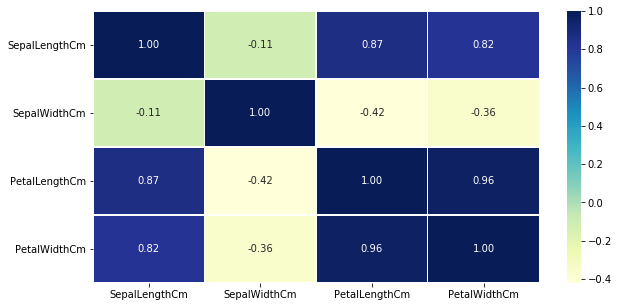

In [186]:
import seaborn as sns
correl_matrix = data.corr()
figure, axis = plt.subplots(figsize=(10, 5))
axis = sns.heatmap(correl_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = axis.get_ylim()

## 1. Supervised Learning

In [187]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [188]:
x = data.drop(['Species'], axis=1)

In [189]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [190]:
y = data['Species']

In [191]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [192]:
from sklearn.model_selection import train_test_split

np.random.seed(45)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [193]:
len(x_train), len(y_train), len(x_test), len(y_test)

(120, 120, 30, 30)

In [194]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
96,5.7,2.9,4.2,1.3
119,6.0,2.2,5.0,1.5
101,5.8,2.7,5.1,1.9
25,5.0,3.0,1.6,0.2


In [195]:
y_train.head()

76     Iris-versicolor
96     Iris-versicolor
119     Iris-virginica
101     Iris-virginica
25         Iris-setosa
Name: Species, dtype: object

In [196]:
y_train.value_counts()

Iris-versicolor    43
Iris-setosa        39
Iris-virginica     38
Name: Species, dtype: int64

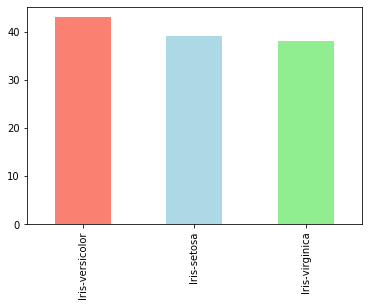

In [197]:
y_train.value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightgreen"])

In [198]:
def encodeTarget(dataset):
    res_dataset = []
    for row in dataset:
        if row == 'Iris-versicolor':
            row = 1
        elif row == 'Iris-setosa':
            row = 0
        else:
            row = -1
        res_dataset.append(row)
    return pd.Series(res_dataset)
        
new_y_train = encodeTarget(y_train)
new_y_train.head()

0    1
1    1
2   -1
3   -1
4    0
dtype: int64

In [199]:
new_y_train.shape, y_train.shape

((120,), (120,))

In [200]:
y_train = encodeTarget(y_train)
y_test = encodeTarget(y_test)

In [201]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

In [202]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [203]:
preds = classifier.predict(x_test) 

In [204]:
preds

array([ 0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,  1,  0, -1,
       -1,  0,  1,  1,  1, -1,  1,  0, -1,  1,  1,  0,  1], dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test,preds)*100

96.66666666666667

In [206]:
confusion_matrix(y_test, preds)

array([[11,  0,  1],
       [ 0, 11,  0],
       [ 0,  0,  7]], dtype=int64)

In [207]:
classification_report(y_test, preds)

'              precision    recall  f1-score   support\n\n          -1       1.00      0.92      0.96        12\n           0       1.00      1.00      1.00        11\n           1       0.88      1.00      0.93         7\n\n    accuracy                           0.97        30\n   macro avg       0.96      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": neighbors.KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}


def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(45)
    scores = {}
    conf_matrix = {}
    report = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        scores[name] = accuracy_score(y_test,preds)*100
        conf_matrix[name] = confusion_matrix(y_test,preds)
        report[name] = classification_report(y_test,preds)
    return (scores, conf_matrix, report)

In [209]:
scores, conf_matrix, report = fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\khavi\Documents\ACUTE\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [210]:
print("\nLogistic Regression\n", conf_matrix['Logistic Regression'])
print("\nKNN\n", conf_matrix['KNN'])
print("\nRandom Forest\n", conf_matrix['Random Forest'])


Logistic Regression
 [[11  0  1]
 [ 0 11  0]
 [ 0  0  7]]

KNN
 [[11  0  1]
 [ 0 11  0]
 [ 0  0  7]]

Random Forest
 [[10  0  2]
 [ 0 11  0]
 [ 0  0  7]]


In [211]:
print("\nLogistic Regression\n", report['Logistic Regression'])
print("---------------------------------------")
print("\nKNN\n", report['KNN'])
print("---------------------------------------")
print("\nRandom Forest\n", report['Random Forest'])


Logistic Regression
               precision    recall  f1-score   support

          -1       1.00      0.92      0.96        12
           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

---------------------------------------

KNN
               precision    recall  f1-score   support

          -1       1.00      0.92      0.96        12
           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

---------------------------------------

Random Forest
               precision    recall  f1-score   support

          -1       1.00      0.83      0.91        12
     

In [212]:
scores

{'Logistic Regression': 96.66666666666667,
 'KNN': 96.66666666666667,
 'Random Forest': 93.33333333333333}

In [213]:
scores = pd.DataFrame(scores, index=["accuracy"])
scores

,Logistic Regression,KNN,Random Forest
accuracy,96.666667,96.666667,93.333333


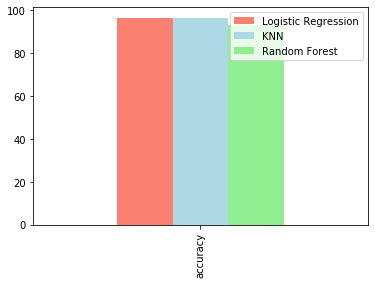

In [214]:
scores.plot(kind='bar', color=["salmon", "lightblue", "lightgreen"])

In [215]:
def decodeTarget(dataset):
    res_dataset = []
    for row in dataset:
        if row == 1:
            row = 'Iris-versicolor'
        elif row == 0:
            row = 'Iris-setosa'
        else:
            row = 'Iris-virginica'
        res_dataset.append(row)
    return pd.Series(res_dataset)
        
new_preds = decodeTarget(preds)
new_preds.head()

0       Iris-setosa
1       Iris-setosa
2    Iris-virginica
3       Iris-setosa
4       Iris-setosa
dtype: object

## 2. Unsupervised Learning

In [216]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [217]:
data = data.drop(['Id'], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [218]:
x = data.drop(['Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [219]:
y = data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

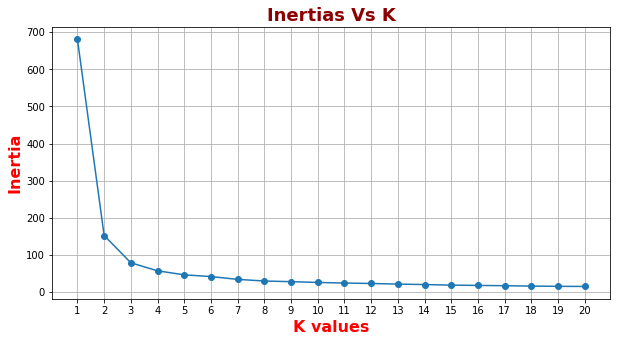

In [220]:
from sklearn.cluster import KMeans
def kmeans_inertia(min, max):
    inertias = []
    for k in range(min, max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.title("Inertias Vs K", fontdict={ 'color': 'darkred', 'weight': 'bold', 'size': 18 })
    plt.plot(range(min, max+1), inertias, '-o')
    plt.xticks(range(min, max+1))
    plt.xlabel("K values", fontdict={ 'color': 'red', 'weight': 'bold', 'size': 16 })
    plt.ylabel("Inertia", fontdict={ 'color': 'red', 'weight': 'bold', 'size': 16 })
    plt.grid(True)
    plt.show()
kmeans_inertia(1, 20)

In [221]:
kmeans = KMeans(n_clusters=3)

In [222]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [223]:
preds = kmeans.predict(x)

In [224]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [225]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [226]:
def encodeTarget(dataset):
    res_dataset = []
    for row in dataset:
        if row == 'Iris-versicolor':
            row = 0
        elif row == 'Iris-setosa':
            row = 1
        else:
            row = 2
        res_dataset.append(row)
    return pd.Series(res_dataset)

In [227]:
y_enc = encodeTarget(y)

In [228]:
y_enc

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [229]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [230]:
classification_report(y_enc, preds)

'              precision    recall  f1-score   support\n\n           0       0.77      0.96      0.86        50\n           1       1.00      1.00      1.00        50\n           2       0.95      0.72      0.82        50\n\n    accuracy                           0.89       150\n   macro avg       0.91      0.89      0.89       150\nweighted avg       0.91      0.89      0.89       150\n'

In [231]:
confusion_matrix(y_enc, preds)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

In [232]:
accuracy_score(y_enc, preds)*100

89.33333333333333

In [233]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(x)
preds = kmeans.predict(x)
accuracy_score(y_enc, preds)*100

89.33333333333333

In [234]:
kmeans = KMeans(n_clusters=3, max_iter=5000)
kmeans.fit(x)
preds = kmeans.predict(x)
accuracy_score(y_enc, preds)*100

44.0

In [235]:
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(x)
preds = kmeans.predict(x)
accuracy_score(y_enc, preds)*100

24.0

In [236]:
x['Label'] = preds
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


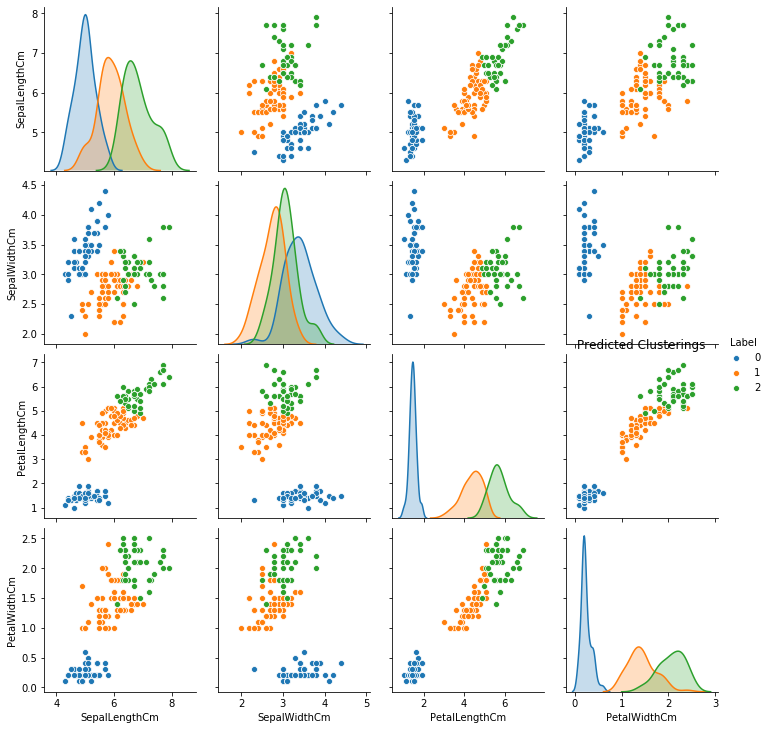

In [237]:
sns.pairplot(data=x, hue='Label')
plt.title("Predicted Clusterings")
plt.show()

In [238]:
x['Label'] = y_enc
x.head(), x.tail()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Label
 0            5.1           3.5            1.4           0.2      1
 1            4.9           3.0            1.4           0.2      1
 2            4.7           3.2            1.3           0.2      1
 3            4.6           3.1            1.5           0.2      1
 4            5.0           3.6            1.4           0.2      1,
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Label
 145            6.7           3.0            5.2           2.3      2
 146            6.3           2.5            5.0           1.9      2
 147            6.5           3.0            5.2           2.0      2
 148            6.2           3.4            5.4           2.3      2
 149            5.9           3.0            5.1           1.8      2)

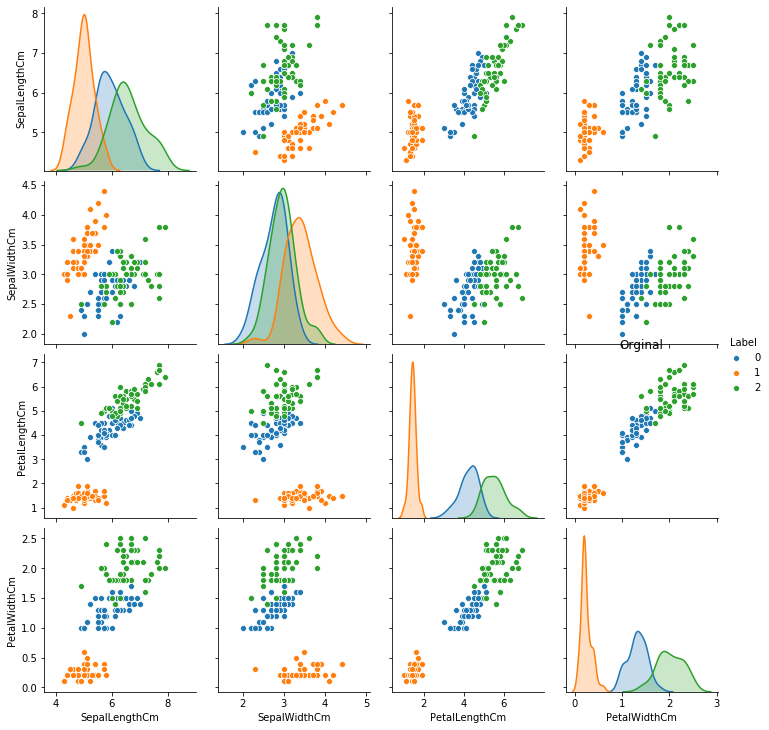

In [239]:
sns.pairplot(data=x, hue='Label')
plt.title("Orginal")
plt.show()

In [242]:
from sklearn.metrics import silhouette_score
silhouette_score(x, preds)

0.5492699167363455